In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-26-14-31_BanditRealWorld_/BanditRealWorld.csv")

In [3]:
masterdata.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration
0,OR,Bioliq_S-MAB_1wx20_MI_1000_100,KL-1-190-0.8,30.25,0.17,0.1136,0
1,OR,Bioliq_S-MAB_1wx20_MI_1000_100,KL-1-190-0.8,29.66,0.17,0.0651,1
2,OR,Bioliq_S-MAB_1wx20_MI_1000_100,KL-1-190-0.8,29.11,0.18,0.0605,2
3,OR,Bioliq_S-MAB_1wx20_MI_1000_100,KL-1-190-0.8,28.57,0.16,0.0603,3
4,OR,Bioliq_S-MAB_1wx20_MI_1000_100,KL-1-190-0.8,28.04,0.15,0.0607,4


In [4]:
masterdata["bandit"].unique()

array(['OR', 'OD', 'IMP-TS', 'CUCBm', 'OS-ADWIN-0.1', 'CUCB',
       'OR-ADWIN-0.1', 'MP-KLUCBPLUS', 'OS', 'MP-KLUCB', 'MP-OTS',
       'CUCB-ADWIN-0.1', 'OD-ADWIN-0.1', 'MP-TS', 'MP-KLUCB-ADWIN-0.1',
       'MP-TS-ADWIN-0.1', 'Exp3.M', 'Exp3.M-ADWIN-0.1'], dtype=object)

In [5]:
masterdata["scalingstrategy"].unique()

array(['KL-1-190-0.8', 'KL-1-190-0.9', 'No-19', 'KL-1-190-0.7', 'No-47',
       'No-95', 'No-38', 'KL-1-190-0.1', 'No-63', 'No-190', 'KL-1-190-0.2',
       'KL-1-190-0.3', 'KL-1-190-0.6', 'KL-1-190-0.4', 'KL-1-190-0.5'], dtype=object)

In [6]:
len(masterdata["bandit"].unique())

18

In [7]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

<IPython.core.display.Javascript object>


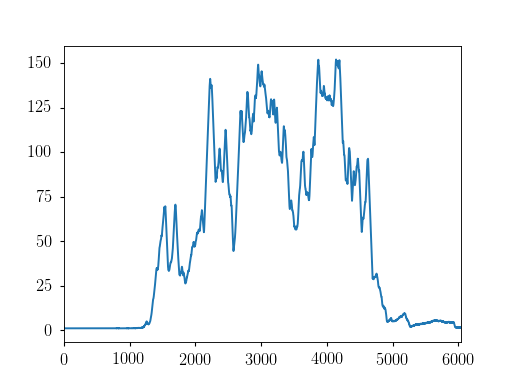

In [12]:
%matplotlib notebook
condition = (masterdata["bandit"] == 'MP-TS-ADWIN-0.1') & (masterdata["scalingstrategy"] == 'KL-1-190-0.8')
masterdata[condition].reset_index()['k'].plot()

<IPython.core.display.Javascript object>


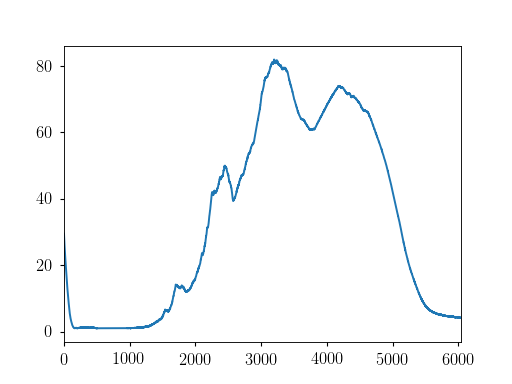

In [9]:
%matplotlib notebook
condition = (masterdata["bandit"] == 'MP-TS') & (masterdata["scalingstrategy"] == 'KL-1-190-0.8')
masterdata[condition].reset_index()['k'].plot()

In [10]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm', 'cputime']].mean()

gain           k  reward/arm   cputime
bandit         scalingstrategy                                             
CUCB           KL-1-190-0.1     48.006955  157.658222    0.273221  0.231479
               KL-1-190-0.2     47.891891  152.956190    0.287854  0.244400
               KL-1-190-0.3     47.279096  145.083418    0.317717  0.268286
               KL-1-190-0.4     46.645421  133.751356    0.338876  0.352871
               KL-1-190-0.5     31.352643   77.854130    0.386622  0.383873
               KL-1-190-0.6     28.737422   60.522343    0.446399  0.416181
               KL-1-190-0.7     32.483607   57.834398    0.487099  0.379582
               KL-1-190-0.8     21.617859   32.242388    0.591975  0.367920
               KL-1-190-0.9      0.836802    1.362111    0.667833  0.171016
               No-19             9.783905   19.000000    0.514942  0.138673
               No-190           48.105978  190.000000    0.253189  0.186158
               No-38            17.651598   38.000000    0.464516  0.144897
               No-47            21.192747   47.000000    0.450910  0.204522
               No-63            26.948667   63.000000    0.427757  0.161021
               No-95            37.596953   95.000000    0.395757  0.179469
CUCB-ADWIN-0.1 KL-1-190-0.1     47.940672  146.949455    0.265107  0.232994
               KL-1-190-0.2     47.736894  130.327038    0.286787  0.276820
               KL-1-190-0.3     47.298998  118.191929    0.315087  0.521829
               KL-1-190-0.4     45.324749  103.913741    0.355952  0.256837
               KL-1-190-0.5     43.938972   87.632080    0.343296  0.213179
               KL-1-190-0.6     38.740255   69.573049    0.346855  0.246950
               KL-1-190-0.7     34.966915   54.993323    0.429279  0.346572
               KL-1-190-0.8     28.017202   39.575885    0.506902  0.382936
               KL-1-190-0.9      4.304521    5.810503    0.443644  0.138192
               No-19             6.269581   19.000000    0.329978  0.150169
               No-190           48.105978  190.000000    0.253189  0.207064
               No-38            10.657394   38.000000    0.280458  0.086000
               No-47            13.514986   47.000000    0.287553  0.214887
               No-63            18.961252   63.000000    0.300972  0.097441
               No-95            24.959099   95.000000    0.262727  0.270182
...                                   ...         ...         ...       ...
OS             KL-1-190-0.1     47.478225  153.522437    0.285577  0.115224
               KL-1-190-0.2     46.883383  148.405411    0.307971  0.120471
               KL-1-190-0.3     45.948139  139.626172    0.334712  0.134429
               KL-1-190-0.4     34.867120  106.421868    0.382474  0.165512
               KL-1-190-0.5     21.586228   60.617430    0.421787  0.205986
               KL-1-190-0.6      4.143386    9.134426    0.567474  0.100128
               KL-1-190-0.7      0.762380    1.460020    0.677725  0.022133
               KL-1-190-0.8      0.699970    1.297132    0.676306  0.012016
               KL-1-190-0.9      0.699970    1.124065    0.689167  0.007074
               No-19            11.040901   19.000000    0.581100  0.016249
               No-190           48.105978  190.000000    0.253189  0.077261
               No-38            20.334989   38.000000    0.535131  0.019525
               No-47            24.302202   47.000000    0.517068  0.025957
               No-63            30.669482   63.000000    0.486817  0.027682
               No-95            40.021858   95.000000    0.421283  0.035518
OS-ADWIN-0.1   KL-1-190-0.1     47.667531  142.712416    0.272028  0.177897
               KL-1-190-0.2     47.181156  124.658477    0.309410  0.344414
               KL-1-190-0.3     46.686526  114.904166    0.349543  0.325325
               KL-1-190-0.4     45.738872  103.301916    0.401402  0.319623
               KL-1-190-0.5     44.534276   91.292570    0.463802  0.275514
         

In [13]:
masterdata["bandit"].unique()

array(['OR', 'OD', 'IMP-TS', 'CUCBm', 'OS-ADWIN-0.1', 'CUCB',
       'OR-ADWIN-0.1', 'MP-KLUCBPLUS', 'OS', 'MP-KLUCB', 'MP-OTS',
       'CUCB-ADWIN-0.1', 'OD-ADWIN-0.1', 'MP-TS', 'MP-KLUCB-ADWIN-0.1',
       'MP-TS-ADWIN-0.1', 'Exp3.M', 'Exp3.M-ADWIN-0.1'], dtype=object)

In [14]:
cubelix9 = sns.color_palette("husl", 9)
cubelix6 = sns.color_palette("husl", 6)

husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 7)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 8)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)
winter5 = sns.color_palette("viridis_r", 5)

In [15]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

prettynames = {
    "KL-1-190-0.1": "KL-S; $\eta^* = 0.1$",
    "KL-1-190-0.2": "KL-S; $\eta^* = 0.2$",
    "KL-1-190-0.3": "KL-S; $\eta^* = 0.3$",
    "KL-1-190-0.4": "KL-S; $\eta^* = 0.4$",
    "KL-1-190-0.5": "KL-S; $\eta^* = 0.5$",
    "KL-1-190-0.6": "KL-S; $\eta^* = 0.6$",
    "KL-1-190-0.7": "KL-S; $\eta^* = 0.7$",
    "KL-1-190-0.8": "KL-S; $\eta^* = 0.8$",
    "KL-1-190-0.9": "KL-S; $\eta^* = 0.9$",
    
    "No-19": "No Scaling; $L= K/10$",
    "No-38": r'No Scaling; $L= K/5$',
    "No-47": r'No Scaling; $L= K/4$',
    "No-63": r'No Scaling; $L= K/3$',
    "No-95": r'No Scaling; $L= K/2$',
    "No-190": r'No Scaling; $L= K$',
    
    "CUCB": "S-CUCB",
    "CUCBm": "S-CUCBm",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    'MP-KLUCBPLUS': "S-KL-UCB+",
    "MP-TS": "S-TS",
    "MP-OTS": "S-OTS",
    "IMP-TS": "S-ITS",
    "OR": "S-RO",
    "OS": "S-SO",
    "OD": "S-DO",
    'OD-ADWIN-0.1': "S-DO-ADWIN",
    'OS-ADWIN-0.1': "S-SO-ADWIN",
    'OR-ADWIN-0.1': "S-RO-ADWIN",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN; $\delta=0.1$',
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN; $\delta=0.1$",
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN; $\delta=0.1$",
    
    'MP-DTS; g=0.7': "S-DTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-DTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-DTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-DTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN; $\delta=0.1$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

styledictionary = {
    "KL-1-190-0.1": {'marker': '+', 'color': cubelix9[0]},
    "KL-1-190-0.2": {'marker': '+', 'color': cubelix9[1]},
    "KL-1-190-0.3": {'marker': '+', 'color': cubelix9[2]},
    "KL-1-190-0.4": {'marker': '+', 'color': cubelix9[3]},
    "KL-1-190-0.5": {'marker': '+', 'color': cubelix9[4]},
    "KL-1-190-0.6": {'marker': '+', 'color': cubelix9[5]},
    "KL-1-190-0.7": {'marker': '+', 'color': cubelix9[6]},
    "KL-1-190-0.8": {'marker': '+', 'color': cubelix9[7]},
    "KL-1-190-0.9": {'marker': '+', 'color': cubelix9[8]},
    
    "No-19": {'marker': '+', 'color': cubelix6[5]},
    "No-38": {'marker': '+', 'color': cubelix6[4]},
    "No-47": {'marker': '+', 'color': cubelix6[3]},
    "No-63": {'marker': '+', 'color': cubelix6[2]},
    "No-95": {'marker': '+', 'color': cubelix6[1]},
    "No-190": {'marker': '+', 'color': cubelix6[0]},
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'P', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': blues5[0], 'linestyle': ":"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'Exp3.M-ADWIN-0.1' : {'marker': 's', 'color': purples5[0], 'linestyle': ":"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'CUCB-ADWIN-0.1': {'marker': 'D', 'color': greens5[0], 'linestyle': ":"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OD-ADWIN-0.1': {'marker': '', 'color': "goldenrod", 'linestyle': "-"},
    'OS-ADWIN-0.1': {'marker': '', 'color': 'black', 'linestyle': "-"}
}

<IPython.core.display.Javascript object>


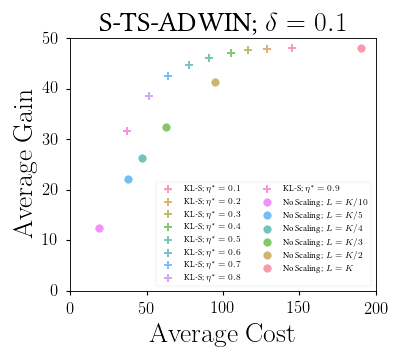

KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$


In [16]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

approach = 'MP-TS-ADWIN-0.1'
subdata = masterdata[masterdata["bandit"] == approach]
means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means


for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
    else:
        marker = "+"
    plt.scatter(x=p['k'], y=p["gain"], marker=marker, 
                label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])
    

plt.legend(ncol=2, fontsize=8)
plt.title("%s"%(prettynames[approach]))
plt.ylabel(r"$\mathrm{Average~Gain}$")
plt.xlabel(r"$\mathrm{Average~Cost}$")

plt.xlim(0,200)
plt.ylim(0,50)
plt.tight_layout()

plt.savefig("RealWorld_S-TS-ADWIN.pdf")

<IPython.core.display.Javascript object>


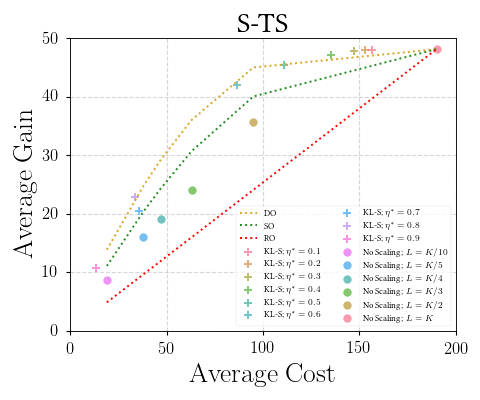

KL-S; $\eta^* = 0.1$
KL-S; $\eta^* = 0.2$
KL-S; $\eta^* = 0.3$
KL-S; $\eta^* = 0.4$
KL-S; $\eta^* = 0.5$
KL-S; $\eta^* = 0.6$
KL-S; $\eta^* = 0.7$
KL-S; $\eta^* = 0.8$
KL-S; $\eta^* = 0.9$
No Scaling; $L= K/10$
No Scaling; $L= K/5$
No Scaling; $L= K/4$
No Scaling; $L= K/3$
No Scaling; $L= K/2$
No Scaling; $L= K$


In [17]:
%matplotlib notebook

plt.figure(figsize=(6,5))

approach = 'MP-TS'
subdata = masterdata[masterdata["bandit"] == approach]
means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
toplot = means

plt.grid(True,axis="y", linestyle="--", alpha=0.5)
plt.grid(True,axis="x", linestyle="--", alpha=0.5)

for i,point in enumerate(toplot.index):
    p = toplot.loc[point,:]
    if "No" in point:
        marker = "o"
    else:
        marker = "+"
    plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])
    print(prettynames[point])
    
os = masterdata[masterdata["bandit"] == "OD"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label="DO", marker="", c="goldenrod", linestyle=":")

os = masterdata[masterdata["bandit"] == "OS"]
os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
os_means.loc[[x for x in os_means.index if "No" in x]]
os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(os_means['k'], os_means["gain"], label="SO", marker="", c="forestgreen", linestyle=":")

OR = masterdata[masterdata["bandit"] == "OR"]
or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
or_means.loc[[x for x in or_means.index if "No" in x]]
or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

plt.plot(or_means['k'], or_means["gain"], label="RO", marker="", c="red", linestyle=":")

plt.legend(ncol=2, fontsize=8)
plt.title("%s"%(prettynames[approach]))
plt.ylabel(r"$\mathrm{Average~Gain}$")
plt.xlabel(r"$\mathrm{Average~Cost}$")

plt.xlim(0,200)
plt.ylim(0,50)
plt.tight_layout()

plt.savefig("RealWorld_S-TS.pdf")

<IPython.core.display.Javascript object>


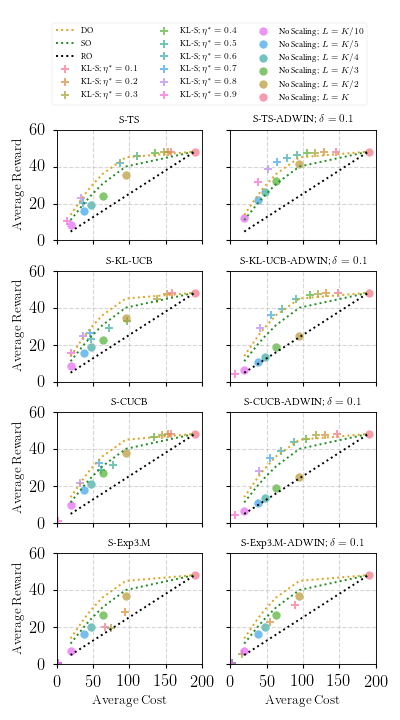

In [18]:
f, axarr = plt.subplots(4,2, figsize=(5,9), sharex=True, sharey=True)
axes = axarr.flatten()

shortshortlist = [
             'MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'CUCB', 
             'CUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             ]

for y,alg in enumerate(shortshortlist):
    plt.sca(axes[y])
    subdata = masterdata[masterdata["bandit"] == alg]
    means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
    means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
           'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
           'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
    toplot = means

    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)

    for i,point in enumerate(toplot.index):
        p = toplot.loc[point,:]
        if "No" in point:
            marker = "o"
        else:
            marker = "+"
        plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                    label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])

    os = masterdata[masterdata["bandit"] == "OD"]
    os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    os_means.loc[[x for x in os_means.index if "No" in x]]
    os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(os_means['k'], os_means["gain"], label="DO", marker="", c="goldenrod", linestyle=":")

    os = masterdata[masterdata["bandit"] == "OS"]
    os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    os_means.loc[[x for x in os_means.index if "No" in x]]
    os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(os_means['k'], os_means["gain"], label="SO", marker="", c="forestgreen", linestyle=":")

    OR = masterdata[masterdata["bandit"] == "OR"]
    or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    or_means.loc[[x for x in or_means.index if "No" in x]]
    or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(or_means['k'], or_means["gain"], label="RO", marker="", c="black", linestyle=":")

    plt.title("%s"%(prettynames[alg]), fontsize=10)
    if(y%2==0):
        plt.ylabel(r"$\mathrm{Average~Reward}$", fontsize=12)
    if(y>5):
        plt.xlabel(r"$\mathrm{Average~Cost}$", fontsize=12)

    plt.xlim(0,200)
    plt.ylim(0,60)
    plt.xticks([0,50,100,150,200])
    plt.yticks([0,20,40,60])
    
    if(y==0):
        plt.legend(ncol=3, fontsize=8, loc='upper center', bbox_to_anchor=(1.05, 2))

plt.tight_layout() 
plt.subplots_adjust(top=0.82)

plt.savefig("RealWorld_1.pdf")

<IPython.core.display.Javascript object>


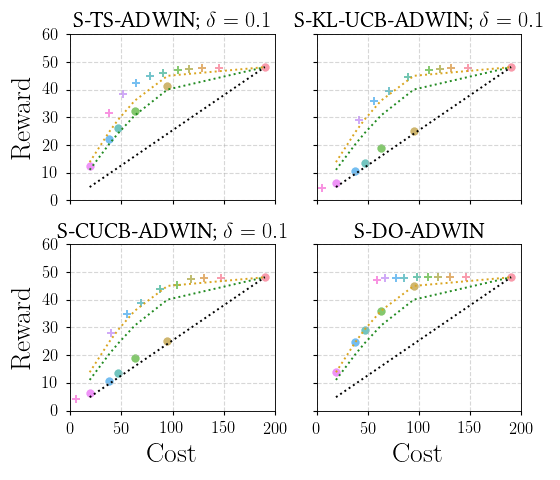

In [19]:
f, axarr = plt.subplots(2,2, figsize=(7,6), sharex=True, sharey=True)
axes = axarr.flatten()

shortshortlist = [
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB-ADWIN-0.1',
             'CUCB-ADWIN-0.1',
             'OD-ADWIN-0.1'
             ]

for y,alg in enumerate(shortshortlist):
    plt.sca(axes[y])
    subdata = masterdata[masterdata["bandit"] == alg]
    means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
    means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
           'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
           'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
    toplot = means

    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)

    for i,point in enumerate(toplot.index):
        p = toplot.loc[point,:]
        if "No" in point:
            marker = "o"
        else:
            marker = "+"
        plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                    label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])

    os = masterdata[masterdata["bandit"] == "OD"]
    os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    os_means.loc[[x for x in os_means.index if "No" in x]]
    os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(os_means['k'], os_means["gain"], label="OD", marker="", c="goldenrod", linestyle=":")

    os = masterdata[masterdata["bandit"] == "OS"]
    os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    os_means.loc[[x for x in os_means.index if "No" in x]]
    os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(os_means['k'], os_means["gain"], label="OS", marker="", c="forestgreen", linestyle=":")

    OR = masterdata[masterdata["bandit"] == "OR"]
    or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    or_means.loc[[x for x in or_means.index if "No" in x]]
    or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(or_means['k'], or_means["gain"], label="OR", marker="", c="black", linestyle=":")

    plt.title("%s"%(prettynames[alg]), fontsize=20)
    if(y%2==0):
        plt.ylabel(r"$\mathrm{Reward}$")
    if(y>1):
        plt.xlabel(r"$\mathrm{Cost}$")

    plt.xlim(0,200)
    plt.ylim(0,60)
    plt.xticks([0,50,100,150,200])
    plt.yticks([0,10,20,30,40,50,60])

plt.tight_layout() 

plt.savefig("RealWorld_2.pdf")

<IPython.core.display.Javascript object>


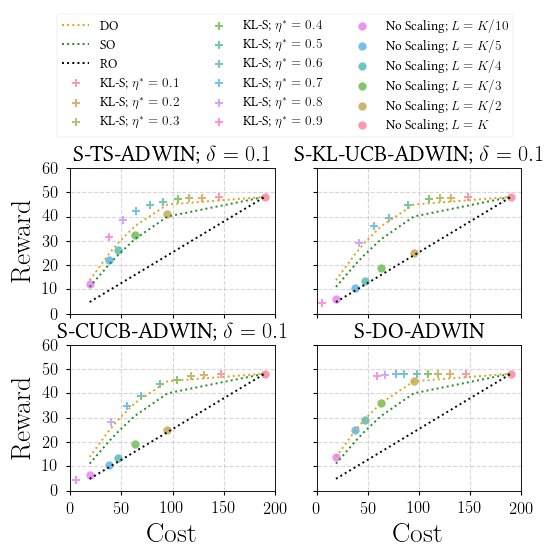

In [20]:
f, axarr = plt.subplots(2,2, figsize=(7,7), sharex=True, sharey=True)
axes = axarr.flatten()

shortshortlist = [
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB-ADWIN-0.1',
             'CUCB-ADWIN-0.1',
             'OD-ADWIN-0.1'
             ]

for y,alg in enumerate(shortshortlist):
    plt.sca(axes[y])
    subdata = masterdata[masterdata["bandit"] == alg]
    means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()
    means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
           'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
           'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])
    toplot = means

    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)

    for i,point in enumerate(toplot.index):
        p = toplot.loc[point,:]
        if "No" in point:
            marker = "o"
        else:
            marker = "+"
        plt.scatter(x=p['k'], y=p["gain"], marker=marker,  s=50,
                    label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])

    os = masterdata[masterdata["bandit"] == "OD"]
    os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    os_means.loc[[x for x in os_means.index if "No" in x]]
    os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(os_means['k'], os_means["gain"], label="DO", marker="", c="goldenrod", linestyle=":")

    os = masterdata[masterdata["bandit"] == "OS"]
    os_means = os.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    os_means.loc[[x for x in os_means.index if "No" in x]]
    os_means = os_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(os_means['k'], os_means["gain"], label="SO", marker="", c="forestgreen", linestyle=":")

    OR = masterdata[masterdata["bandit"] == "OR"]
    or_means = OR.groupby("scalingstrategy")[['gain', 'k', 'reward/arm']].mean()   
    or_means.loc[[x for x in or_means.index if "No" in x]]
    or_means = or_means.reindex(['No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    plt.plot(or_means['k'], or_means["gain"], label="RO", marker="", c="black", linestyle=":")

    plt.title("%s"%(prettynames[alg]), fontsize=20)
    if(y%2==0):
        plt.ylabel(r"$\mathrm{Reward}$")
    if(y>1):
        plt.xlabel(r"$\mathrm{Cost}$")

    plt.xlim(0,200)
    plt.ylim(0,60)
    plt.xticks([0,50,100,150,200])
    plt.yticks([0,10,20,30,40,50,60])
    
    if(y==0):
        plt.legend(ncol=3, fontsize=12, loc='upper center', bbox_to_anchor=(1.05, 2.1))

plt.tight_layout() 
plt.subplots_adjust(top=0.70)

plt.savefig("RealWorld_2_legend.pdf")

In [21]:
plotkind = "small"

shortshortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             #'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             #'Exp3.M.auto', 
             'Exp3.M-ADWIN-0.1', 
             #'CUCB', 
             'CUCB-ADWIN-0.1', 
             #'OR', 
             #'OS',
             #'OS-ADWIN-0.1',
             'OD-ADWIN-0.1']

<IPython.core.display.Javascript object>


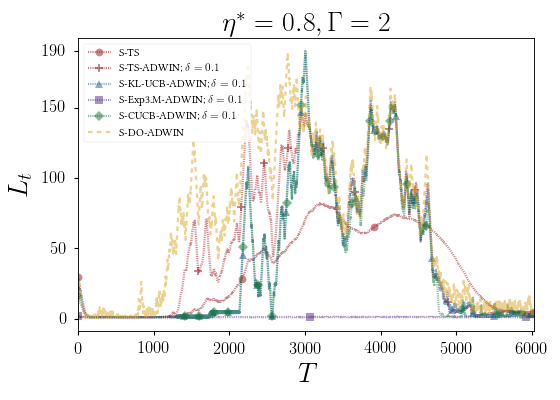

In [22]:
%matplotlib notebook
strategy = 'KL-1-190-0.8'

f, axarr = plt.subplots(1,1, figsize=(7,5), sharex=True, sharey='row')

for y,alg in enumerate(shortshortlist):
    subdata = masterdata[masterdata["bandit"] == alg]
    subdata = subdata[subdata["scalingstrategy"] == strategy]
    if(alg in ['OD-ADWIN-0.1']):
        subdata.sort_values("iteration").reset_index().k.plot(label=prettynames[alg], linewidth=2, markevery=0.5,
                                                 c=styledictionary[alg]['color'], alpha=0.5, dashes=(2,2),
                                                 marker=styledictionary[alg]['marker']) 
    else:
        subdata.sort_values("iteration").reset_index().k.plot(label=prettynames[alg], linewidth=2, markevery=0.5,
                                                 c=styledictionary[alg]['color'], alpha=0.5,
                                                 marker=styledictionary[alg]['marker'], dashes=(0.5,0.5)) 

    
plt.title("$\eta^* = 0.8, \Gamma=2$")
plt.yticks([0,50,100,150,190])
plt.legend(fontsize = 10, ncol=1, loc='best')
plt.xlabel("$T$")
plt.ylabel("$L_t$")

plt.tight_layout()
plt.savefig("RealWorld_Lt.pdf")

<IPython.core.display.Javascript object>


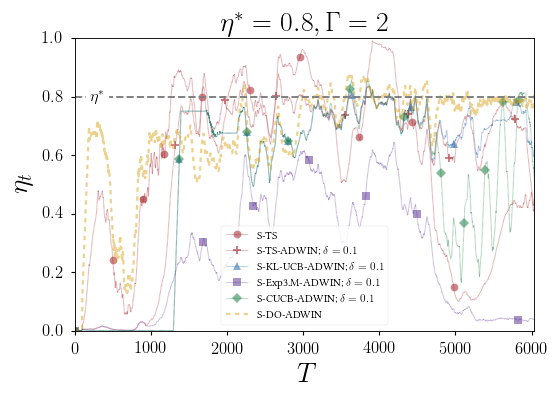

In [23]:
%matplotlib notebook

eta = 0.8
strategy = 'KL-1-190-%s'%eta

f, axarr = plt.subplots(1,1, figsize=(7,5), sharex=True, sharey='row')

for y,alg in enumerate(shortshortlist):
    subdata = masterdata[masterdata["bandit"] == alg]
    subdata = subdata[subdata["scalingstrategy"] == strategy]
    
    rewards = subdata.sort_values("iteration").reset_index()["reward/arm"]
    rewards = rewards.rolling(100).mean().fillna(0)
    if(alg in ['OD-ADWIN-0.1']):
        rewards.plot(label=prettynames[alg], linewidth=2, markevery=0.5,
                                                 c=styledictionary[alg]['color'], alpha=0.5, dashes=(2,2),
                                                 marker=styledictionary[alg]['marker']) 
    else:
        rewards.plot(label=prettynames[alg], linewidth=1, markevery=0.5,
                                                 c=styledictionary[alg]['color'], alpha=0.5,
                                                 marker=styledictionary[alg]['marker'], dashes=(0.5,0.5)) 

    
plt.title("$\eta^* = %s, \Gamma=2$"%eta)
plt.legend(fontsize = 10, ncol=1, loc='best')
plt.xlabel("$T$")
plt.ylim((0,1))
plt.ylabel("$\eta_t$")
plt.axhline(y=eta, linestyle="--", c="grey")
plt.text(300, eta, "$\eta^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')

plt.tight_layout()
plt.savefig("RealWorld_etat.pdf")

<IPython.core.display.Javascript object>


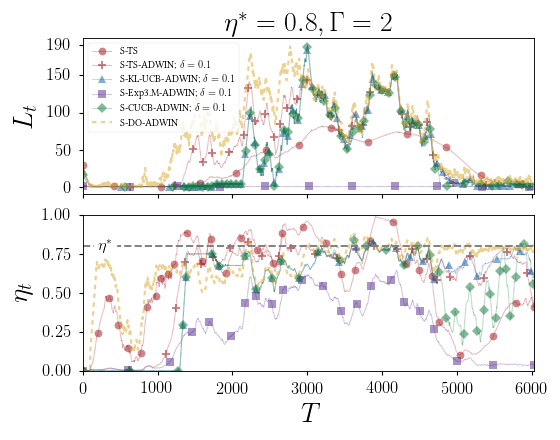

In [24]:
strategy = 'KL-1-190-0.8'

f, axarr = plt.subplots(2,1, figsize=(7,5.5), sharex=True, sharey='row')

plt.sca(axarr[0])
for y,alg in enumerate(shortshortlist):
    subdata = masterdata[masterdata["bandit"] == alg]
    subdata = subdata[subdata["scalingstrategy"] == strategy]
    if(alg in ['OD-ADWIN-0.1']):
        subdata.sort_values("iteration").reset_index().k.plot(label=prettynames[alg], linewidth=2, markevery=0.1,
                                                 c=styledictionary[alg]['color'], alpha=0.5,dashes=(2,2),
                                                 marker=styledictionary[alg]['marker']) 
    else:
        subdata.sort_values("iteration").reset_index().k.plot(label=prettynames[alg], linewidth=1, markevery=0.1,
                                                 c=styledictionary[alg]['color'], alpha=0.5,
                                                 marker=styledictionary[alg]['marker'], dashes=(0.5,0.5)) 

    
plt.title("$\eta^* = 0.8, \Gamma=2$")
plt.yticks([0,50,100,150,190])
plt.legend(fontsize = 9, ncol=1, loc='best')

plt.ylabel("$L_t$")

plt.sca(axarr[1])
for y,alg in enumerate(shortshortlist):
    subdata = masterdata[masterdata["bandit"] == alg]
    subdata = subdata[subdata["scalingstrategy"] == strategy]
    
    rewards = subdata.sort_values("iteration").reset_index()["reward/arm"]
    rewards = rewards.rolling(100).mean().fillna(0)
    if(alg in ['OD-ADWIN-0.1']):
        rewards.plot(label=prettynames[alg], linewidth=2, markevery=0.1,
                                                 c=styledictionary[alg]['color'], alpha=0.5, dashes=(2,2),
                                                 marker=styledictionary[alg]['marker']) 
    else:
        rewards.plot(label=prettynames[alg], linewidth=1, markevery=0.1,
                                                 c=styledictionary[alg]['color'], alpha=0.5,
                                                 marker=styledictionary[alg]['marker'], dashes=(0.5,0.5)) 
        
plt.xlabel("$T$")
plt.ylim((0,1))
plt.ylabel("$\eta_t$")
plt.axhline(y=eta, linestyle="--", c="grey")
plt.text(300, eta, "$\eta^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')

plt.tight_layout()
plt.savefig("RealWorld_Lt_etat.pdf")

<IPython.core.display.Javascript object>


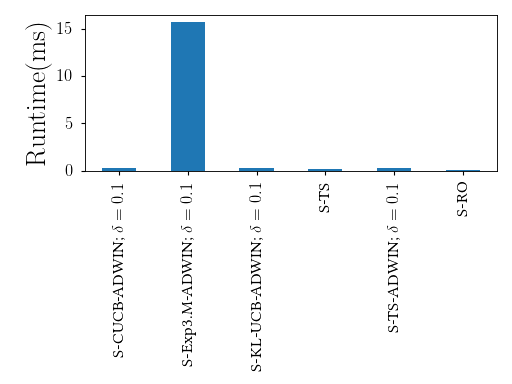

In [25]:
%matplotlib notebook

algs = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             #'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             #'Exp3.M.auto', 
             'Exp3.M-ADWIN-0.1', 
             #'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             #'OS',
             #'OS-ADWIN-0.1',
             #'OD-ADWIN-0.1'
       ]


means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime (ms)}$")
plt.tight_layout()
plt.savefig("RealWorld_Runtime.pdf")

In [26]:
masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()

,k,gain,cputime,iteration,reward/arm
bandit,,,,,
CUCB-ADWIN-0.1,80.597800,30.715831,0.242803,3019,0.333853
Exp3.M-ADWIN-0.1,41.270660,14.441609,15.729794,3019,0.304994
MP-KLUCB-ADWIN-0.1,81.754426,31.098716,0.301249,3019,0.343522
MP-TS,88.229367,32.238219,0.190234,3019,0.401248
MP-TS-ADWIN-0.1,84.614984,38.399169,0.234095,3019,0.454895
OR,39.739357,10.334975,0.076942,3019,0.253348


In [27]:
masterdata["scalingstrategy"].unique()

array(['KL-1-190-0.8', 'KL-1-190-0.9', 'No-19', 'KL-1-190-0.7', 'No-47',
       'No-95', 'No-38', 'KL-1-190-0.1', 'No-63', 'No-190', 'KL-1-190-0.2',
       'KL-1-190-0.3', 'KL-1-190-0.6', 'KL-1-190-0.4', 'KL-1-190-0.5'], dtype=object)

In [28]:
algss =[ 'CUCB', 'OR', 'CUCB-ADWIN-0.1', 'OS-ADWIN-0.1', 'OS',
       'OD-ADWIN-0.1', 'MP-KLUCB', 'MP-KLUCB-ADWIN-0.1', #'OR-ADWIN-0.1',
       'MP-TS', 'MP-TS-ADWIN-0.1', 'Exp3.M', 'Exp3.M-ADWIN-0.1']

<IPython.core.display.Javascript object>


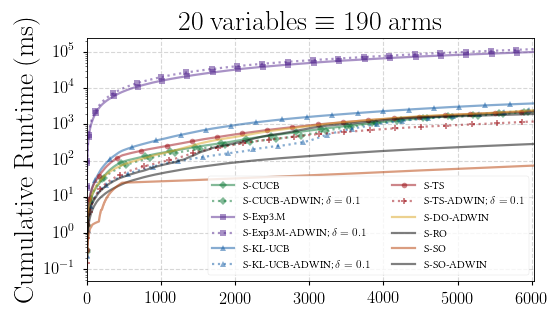

In [29]:
%matplotlib notebook

f, axarr = plt.subplots(1,1, figsize=(7,4), sharex=True, sharey='row')

subdata = masterdata
subdata = masterdata[masterdata["scalingstrategy"] == 'KL-1-190-0.8']
data_grouped = subdata[subdata["bandit"].isin(algss)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2

    cumsum.plot(label=prettynames[name],linewidth=lw, logy=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    plt.ylabel("$\mathrm{Runtime (ms)}$")
    plt.ylabel("$\mathrm{Cumulative~Runtime~(ms)}$")
    plt.title("$20~\mathrm{variables} \equiv 190~\mathrm{arms}$")
    
    plt.grid(True,axis="y", linestyle="--", alpha=0.5)
    plt.grid(True,axis="x", linestyle="--", alpha=0.5)
    
    plt.legend(fontsize=10, ncol=2)
    
plt.tight_layout()
plt.savefig("abrupt_CumulativeRuntime.pdf")

In [30]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

<IPython.core.display.Javascript object>


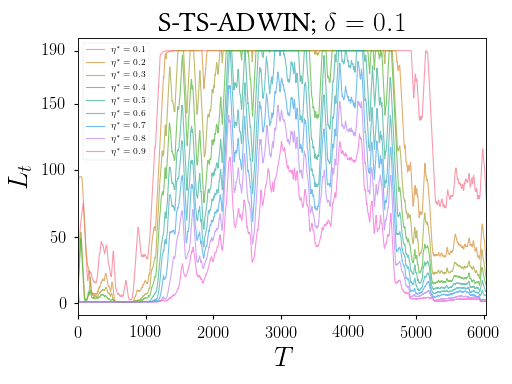

In [31]:
%matplotlib notebook
strategies = ['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9']

alg = "MP-TS-ADWIN-0.1"
for y,strat in enumerate(strategies):
    subdata = masterdata[masterdata["scalingstrategy"] == strat]
    subdata = subdata[subdata["bandit"] == alg]
    subdata.sort_values("iteration").reset_index().k.plot(label=r'$\eta^*=%s$'%strat[-3::], linewidth=1, 
                                                          markevery=0.5, alpha = 0.7,
                                                          c=styledictionary[strat]['color'])
    
plt.yticks([0,50,100,150,190])
plt.legend(fontsize = 8, ncol=1, loc='best')
plt.title(prettynames[alg])
plt.xlabel("$T$")
plt.ylabel("$L_t$")
plt.tight_layout()
plt.savefig("RealWord_S-TS-ADWIN_Lt_eta.pdf")

<IPython.core.display.Javascript object>


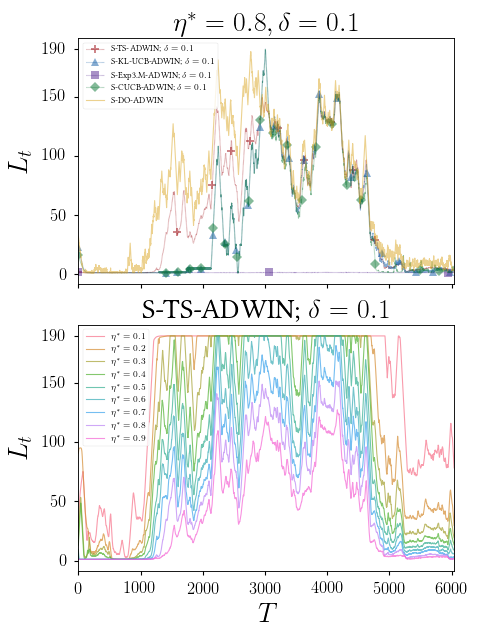

In [32]:
%matplotlib notebook
f, axarr = plt.subplots(2,1, figsize=(6,8), sharex=True, sharey='row')
axes = axarr.flatten()

#################
plt.sca(axes[0])

shortshortlist = [#'MP-TS', 
             'MP-TS-ADWIN-0.1', 
             #'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             #'Exp3.M.auto', 
             'Exp3.M-ADWIN-0.1', 
             #'CUCB', 
             'CUCB-ADWIN-0.1', 
             #'OR', 
             #'OS',
             #'OS-ADWIN-0.1',
             'OD-ADWIN-0.1']



strategy = 'KL-1-190-0.8'

for y,alg in enumerate(shortshortlist):
    subdata = masterdata[masterdata["bandit"] == alg]
    subdata = subdata[subdata["scalingstrategy"] == strategy]
    if("OD" in alg):
        subdata.sort_values("iteration").reset_index().k.plot(label=prettynames[alg], linewidth=1, markevery=0.5,
                                                 c=styledictionary[alg]['color'], alpha=0.5,
                                                 marker=styledictionary[alg]['marker']) 
    else:
        subdata.sort_values("iteration").reset_index().k.plot(label=prettynames[alg], linewidth=1, markevery=0.5,
                                                 c=styledictionary[alg]['color'], alpha=0.5,
                                                 marker=styledictionary[alg]['marker'], dashes=(0.5,0.5)) 

    
plt.title("$\eta^* = 0.8, \delta=0.1$")
plt.yticks([0,50,100,150,190])
plt.legend(fontsize = 8, ncol=1, loc='best')
#plt.xlabel("$T$")
plt.ylabel("$L_t$")

################
plt.sca(axes[1])

alg = "MP-TS-ADWIN-0.1"
for y,strat in enumerate(strategies):
    subdata = masterdata[masterdata["scalingstrategy"] == strat]
    subdata = subdata[subdata["bandit"] == alg]
    subdata.sort_values("iteration").reset_index().k.plot(label=r'$\eta^*=%s$'%strat[-3::], linewidth=1, 
                                                          markevery=0.5, alpha = 0.7,
                                                          c=styledictionary[strat]['color'])
    
plt.yticks([0,50,100,150,190])
plt.legend(fontsize = 8, ncol=1, loc='best')
plt.title(prettynames[alg])
plt.xlabel("$T$")
plt.ylabel("$L_t$")
plt.tight_layout()

plt.savefig("RealWorld_Lt.pdf")

<IPython.core.display.Javascript object>


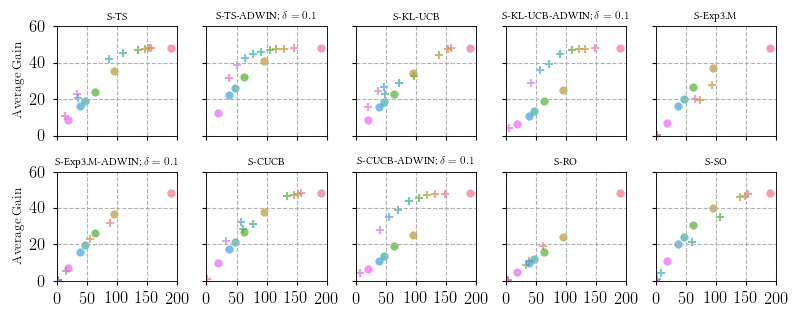

In [35]:
%matplotlib notebook
f, axarr = plt.subplots(2,5, figsize=(10,4), sharex=True, sharey=True)
axes = axarr.flatten()
toplot="gain"

for y,alg in enumerate(shortlist):
    plt.sca(axes[y])
    plt.grid(True,axis="y", linestyle="--")
    plt.grid(True,axis="x", linestyle="--")

    subdata = masterdata[masterdata["bandit"] == alg]
    means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm', "cputime"]].mean()
    means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    for i,point in enumerate(means.index):
        p = means.loc[point,:]
        if "No" in point:
            marker = "o"
        else:
            marker = "+"
        plt.scatter(x=p['k'], y=p["gain"], marker=marker, 
                    label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])
    
    plt.title("%s"%(prettynames[alg]), fontsize=10)
    
    if(y==0 or y==5):
        plt.ylabel(r"$\mathrm{Average~Gain}$", fontsize=12)


    plt.xlim(0,200)
    plt.ylim(0,60)
    plt.xticks([0,50,100,150,200])

plt.tight_layout()

plt.savefig(r"RealWorld_%s_small.pdf"%toplot)

<IPython.core.display.Javascript object>


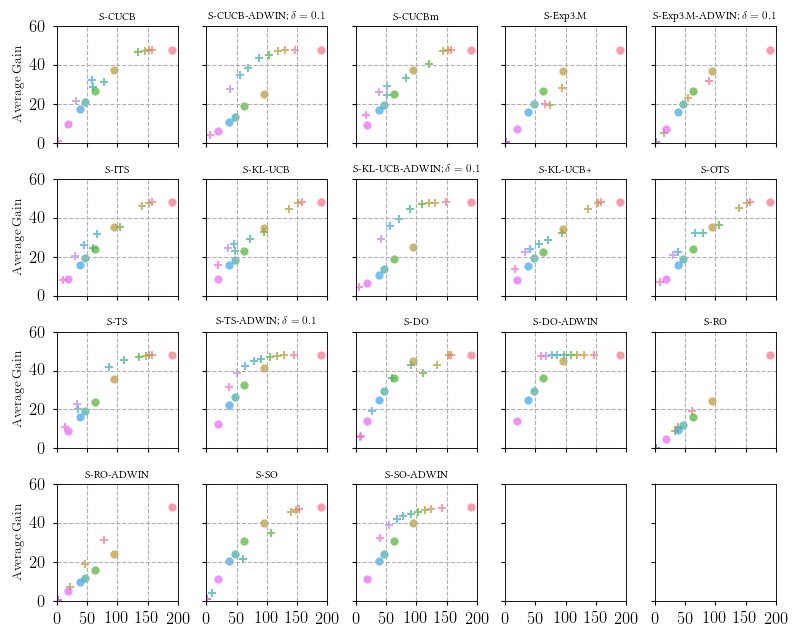

In [36]:
%matplotlib notebook
f, axarr = plt.subplots(4,5, figsize=(10,8), sharex=True, sharey=True)
axes = axarr.flatten()
toplot="gain"

for y,alg in enumerate(sorted(masterdata.bandit.unique())):
    plt.sca(axes[y])
    plt.grid(True,axis="y", linestyle="--")
    plt.grid(True,axis="x", linestyle="--")

    subdata = masterdata[masterdata["bandit"] == alg]
    means = subdata.groupby("scalingstrategy")[['gain', 'k', 'reward/arm', "cputime"]].mean()
    means = means.reindex(['KL-1-190-0.1', 'KL-1-190-0.2', 'KL-1-190-0.3', 'KL-1-190-0.4',
       'KL-1-190-0.5', 'KL-1-190-0.6', 'KL-1-190-0.7', 'KL-1-190-0.8',
       'KL-1-190-0.9', 'No-19', 'No-38', 'No-47', 'No-63', 'No-95', 'No-190'])

    for i,point in enumerate(means.index):
        p = means.loc[point,:]
        if "No" in point:
            marker = "o"
        else:
            marker = "+"
        plt.scatter(x=p['k'], y=p["gain"], marker=marker, 
                    label=prettynames[point], alpha=0.7,color=styledictionary[point]['color'])

    plt.title("%s"%(prettynames[alg]), fontsize=10)
    
    if(y%5 ==0):
        plt.ylabel(r"$\mathrm{Average~Gain}$", fontsize=12)

    plt.xlim(0,200)
    plt.ylim(0,60)
    plt.xticks([0,50,100,150,200])

plt.tight_layout()

plt.savefig(r"RealWorld_%s_long.pdf"%toplot)